## [3] Gender Recognition Through Face Using Deep Learning
<img src="images/[3].png"> <br>

In [1]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.utils import plot_model
from helper.prepare_data import prepare_data

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [2]:
choice = 2

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [3]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice)

Display some exemplary images:

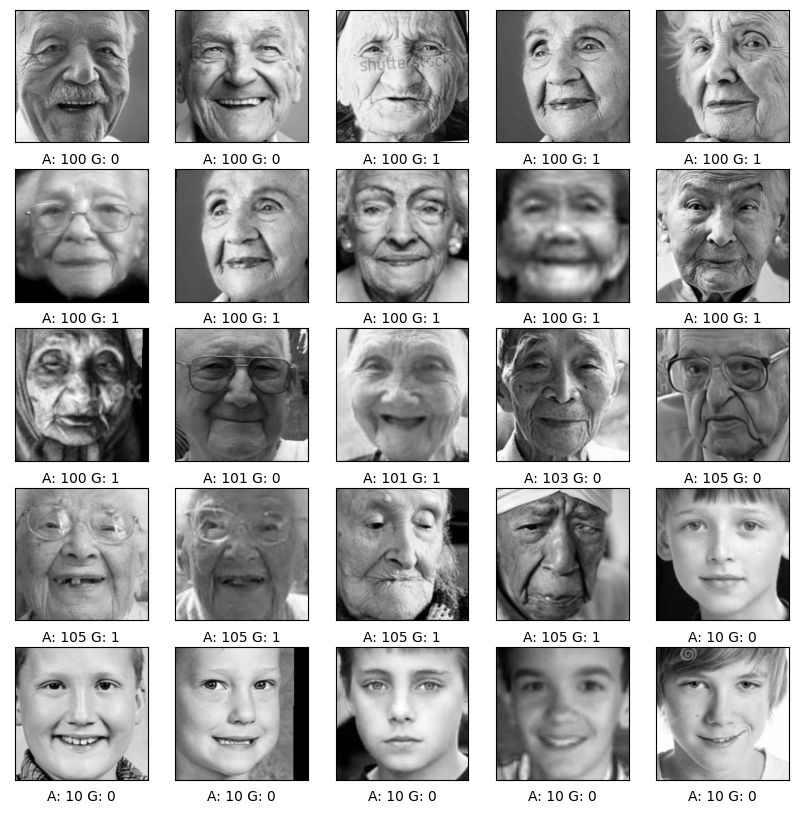

In [4]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    # plt.imshow(x[i].reshape(img_size, img_size, 3), cmap='gray')
    plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

Build the model:

In [5]:
inputs = Input((img_size, img_size, 1))

layer = Conv2D(64, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_1') (inputs)
layer = MaxPooling2D(pool_size = (2, 2)) (layer)

layer = Conv2D(128, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_2') (layer)
layer = MaxPooling2D(pool_size = (2, 2)) (layer)

layer = Conv2D(256, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_3') (layer)
layer = Conv2D(256, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_4') (layer)
layer = MaxPooling2D(pool_size = (2, 2)) (layer)

layer = Conv2D(512, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_5') (layer)
layer = Conv2D(512, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_6') (layer)
layer = MaxPooling2D(pool_size = (2, 2)) (layer)

layer = Conv2D(512, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_7') (layer)
layer = Conv2D(512, kernel_size = (3, 3), activation = 'relu', name = 'conv2d_8') (layer)
layer = MaxPooling2D(pool_size = (2, 2)) (layer)

layer = Flatten() (layer)

Dense_1 = Dense(4096, activation='relu') (layer)
Dense_2 = Dense(4096, activation='relu') (Dense_1)

Dense_output_1 = Dense(1, activation='softmax') (Dense_2) # relu for age

model = Model(inputs = [inputs], outputs = Dense_output_1)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'mae'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       295168

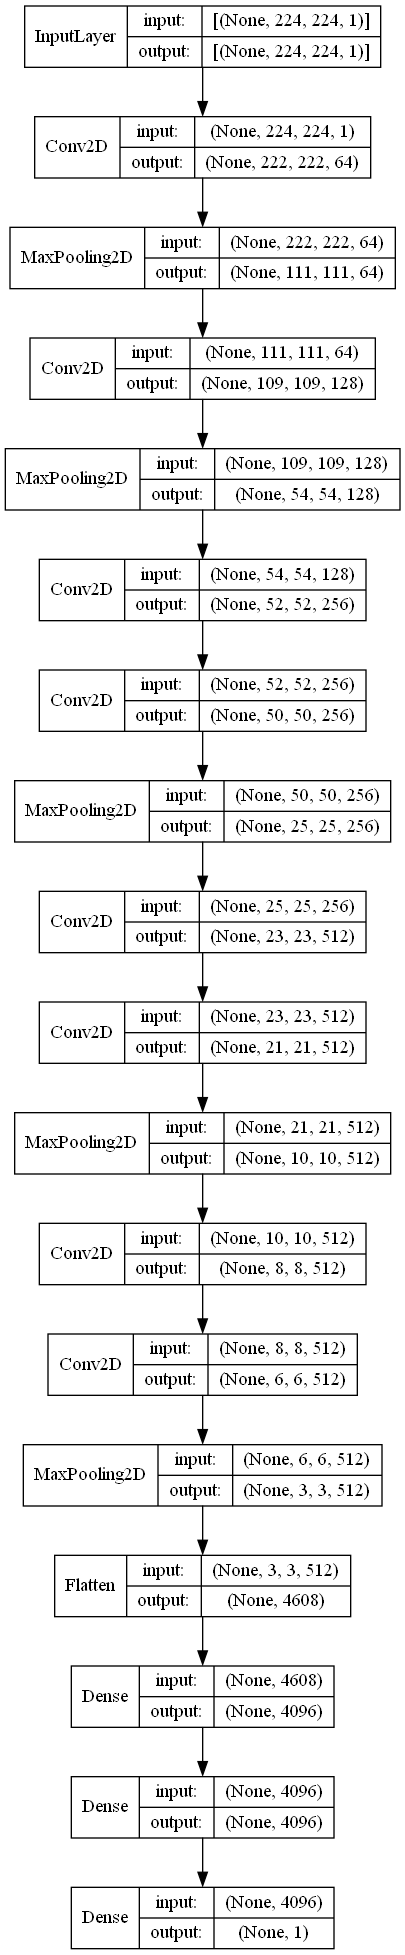

In [6]:
plot_model(model, to_file = os.getcwd() + '//images//models//convnet_model.png', show_shapes = True, show_dtype = False, show_layer_names = False, rankdir = 'TB', expand_nested = False, dpi = 96)

In [ ]:
history = model.fit(x, y_gender , epochs = 20, validation_split = 0.2)

Epoch 1/10
593/593 [==============================] - 1912s 3s/step - loss: 4057.9944 - accuracy: 0.0587 - mae: 13.4966 - val_loss: 1443.3795 - val_accuracy: 0.0000e+00 - val_mae: 35.5855
Epoch 2/10
593/593 [==============================] - 1928s 3s/step - loss: 126.2760 - accuracy: 0.0481 - mae: 8.4340 - val_loss: 826.2532 - val_accuracy: 0.0000e+00 - val_mae: 26.0939
Epoch 3/10
593/593 [==============================] - 1930s 3s/step - loss: 87.1965 - accuracy: 0.0263 - mae: 6.8827 - val_loss: 813.9830 - val_accuracy: 0.0000e+00 - val_mae: 25.5861
Epoch 4/10
128/593 [=====>........................] - ETA: 5:37:41 - loss: 76.1808 - accuracy: 0.0146 - mae: 6.3676

In [ ]:
age_acc = history.history['mae']
age_val_acc = history.history['val_mae']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, age_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Gender Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.figure()

plt.savefig(os.getcwd() + '//images//plots//convnet_gender_mae_ds_' + str(choice))

In [ ]:
age_acc = history.history['accuracy']
age_val_acc = history.history['val_accuracy']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.figure()

plt.savefig(os.getcwd() + '//images//plots//convnet_gender_accuracy_ds_' + str(choice))